# Exercise 8: Hypothesis Testing 



## Table of Contents

* Parametric tests
    * one-sample t-test
    * paired t-test
    * two-sample t-test
    * ANOVA
* Testing parametric assumptions
    * Verifying assumptions
    * Modifying data 
* Non-parametric tests
    * Signed-rank tests
    * Bootstrapping and estimation plots

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

## Parametric tests

### one-sample t-test

In [37]:
# Generating data 

Y = np.random.normal(loc=3, scale=2, size=100)

In [39]:
# Excersise: What do you expect for pvalue if popmean = 3? What happens as you move away from 3? 
mu = 2.5
sps.ttest_1samp(Y, popmean=mu)

Ttest_1sampResult(statistic=2.8094140624415154, pvalue=0.005981223770258623)

In [40]:
# Exersise: find p value by using statsmodels and thinking about the test as a model
df_one_samp = pd.DataFrame(data = {'Y': Y - mu})
one_samp_model = smf.ols('Y ~ 1', data=df_one_samp)
one_samp_results = one_samp_model.fit()
one_samp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                nan
Time:                        12:08:40   Log-Likelihood:                -214.46
No. Observations:                 100   AIC:                             430.9
Df Residuals:                      99   BIC:                             433.5
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5834      0.208      2.809      0.006       0.171       0.995
==============================================================================
Omnibus:                        0.774   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.815
Skew:                          -0.024   Prob(JB):                        0.665
Kurtosis:                       2.560   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Paired t-test

In [42]:
# Generating data 
N = 100
X1 = np.random.normal(loc=0, scale=2, size=N)
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)


In [43]:
sps.ttest_rel(X1, X2)

Ttest_relResult(statistic=-20.602944036083002, pvalue=1.3992129116501313e-37)

In [ ]:
# Exercise: Use ttest_1samp amd show that you get the same result if you do one-way t-test of the difference






### Two-sample t-test 

In [51]:
# Generating data 
N = 100
effect_size = 1 
std_dev = 2
X1 = np.random.normal(loc=0, scale=std_dev, size=N)
X2 = np.random.normal(loc=effect_size, scale=std_dev, size=N)

In [52]:
sps.ttest_ind(X1, X2)

Ttest_indResult(statistic=-2.6370898479597686, pvalue=0.009025793791669342)

In [55]:
# Exersise: find p value by using statsmodels and thinking about the test as a model
df_two_samp = pd.DataFrame(data={'X1': X1, 'X2': X2, 'Y': X2 - X1})
two_samp_model = smf.ols('Y ~ 1', data=df_two_samp)
two_samp_results = two_samp_model.fit()
two_samp_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                nan
Time:                        12:25:10   Log-Likelihood:                -240.62
No. Observations:                 100   AIC:                             483.2
Df Residuals:                      99   BIC:                             485.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7591      0.270      2.814      0.006       0.224       1.294
==============================================================================
Omnibus:                        2.780   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.778
Skew:                           0.389   Prob(JB):                        0.249
Kurtosis:                       2.749   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANOVA

In [ ]:
# Generating data 
N = 100
effect_size_2 = 1
effect_size_3 = -3
std_dev = 2
X1 = np.random.normal(loc=0, scale=std_dev, size=N)
X2 = np.random.normal(loc=effect_size_2, scale=std_dev, size=N)
X3 = np.random.normal(loc=effect_size_3, scale=std_dev, size=N)

In [ ]:
sps.f_oneway(X1, X2, X3)

In [ ]:
# Exersise (tougher): find p value by using statsmodels and thinking about the test as a model



## Testing non-parametic assumptions

In [ ]:
# Exercise: Generate some non-gaussian data, make sure you know how to specifcy the mean of the 
# population and your sample size










In [ ]:
# Exercise: Test it ASSUMING it meets assumptions of parametric tests. Do you get the correct result?
# 1. Play around with sample size, variances, etc. 
# 2. If you are feeling really into it, draw a graph showing what happens as one population gets 
# further and further from normal. 







In [ ]:
# Exercise: Look up one of the following and apply it to your data: 
# 
# Data are normally distributed
#    D’Agostino-Pearson
#    Shapiro-Wilk
#    Kolmogorov-Smirnov
#    Lilliefors Test
# Equal variance between groups
#    Levene’s Test





## Non-parametric tests

### Signed-rank tests

#### Wilcoxon sign-test

In [5]:
# Generating non-normal data
Y = np.exp(np.random.randn(100))
Y = Y - Y.mean()

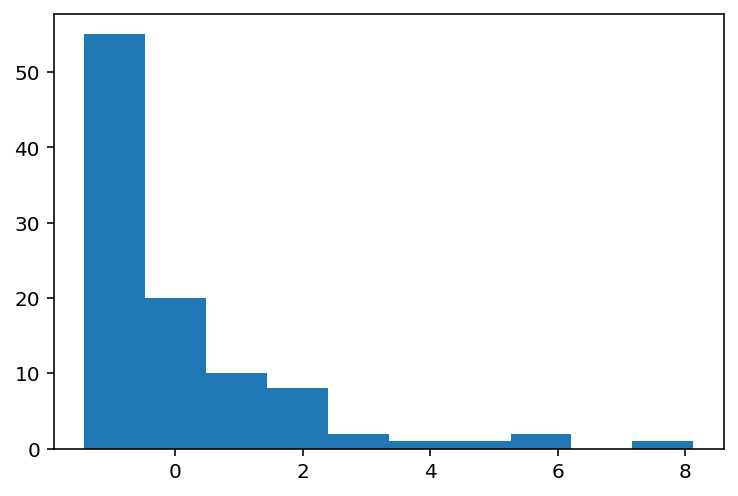

In [6]:
# Plotting data
fig, ax = plt.subplots()
x, c, _ = ax.hist(Y, bins=10)

In [7]:
# Testing for normality
sps.normaltest(Y)

NormaltestResult(statistic=73.1566515958107, pvalue=1.300873146285011e-16)

In [8]:
# Testing if mean is different from 0 
sps.wilcoxon(Y)

WilcoxonResult(statistic=1822.0, pvalue=0.015642897586608466)

In [ ]:
# Using 
signed_rank_Y = np.sign(Y)*sps.rankdata(Y)
sps.ttest_1samp(signed_rank_Y, popmean=0)

In [ ]:
signed_rank_df = pd.DataFrame({'Y': signed_rank_Y})
smf.ols("Y ~ 1", data=signed_rank_df).fit().pvalues[0]

#### Wilcoxon signed-rank test 

In [9]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)

In [10]:
sps.wilcoxon(X1, X2)

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)

#### Mann-Whitney U

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = np.exp(np.random.normal(loc=2, scale=1, size=N))

In [11]:
sps.mannwhitneyu(X1, X2)

MannwhitneyuResult(statistic=2860.0, pvalue=8.58480923102811e-08)

In [50]:
# Exercise: Compare p values obtained ising a t-test and a rank test for NORMAL data that does 
# satisfy parametric assumptions 

effect_sizes = np.arange(0, 2, .1)
N_rep = 2000
N = 100

t_ps = []
mwu_ps = []

for effect in effect_sizes:
    t_ps_current = []
    mwu_ps_current = []
    for i in range(N_rep):
        X1 = np.random.normal(loc=0, scale=1, size=N)
        X2 = np.random.normal(loc=effect, scale=1, size=N)
        t_ps_current.append(sps.ttest_ind(X1, X2)[1])
        mwu_ps_current.append(sps.mannwhitneyu(X1, X2, alternative="two-sided")[1])
    t_ps.append(t_ps_current)
    mwu_ps.append(mwu_ps_current)

t_ps = np.array(t_ps)
mwu_ps = np.array(mwu_ps)

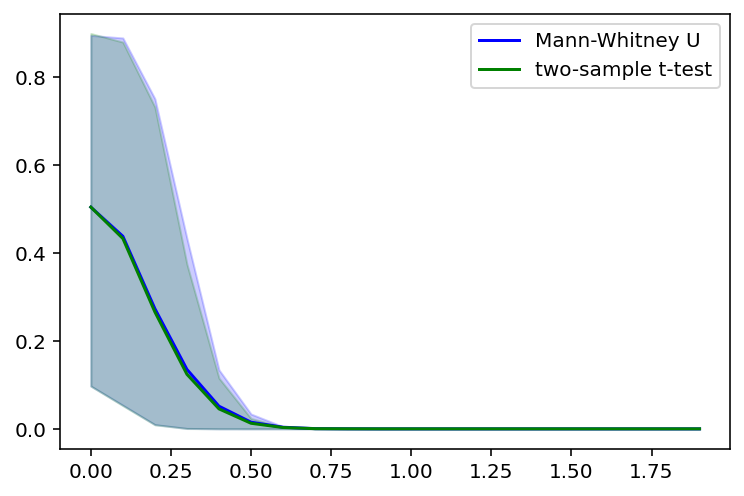

In [51]:
fig, ax = plt.subplots()
ax.plot(effect_sizes, mwu_ps.mean(axis=1), label="Mann-Whitney U", color='blue')
ax.fill_between(effect_sizes, np.percentile(mwu_ps, 10, axis=1), np.percentile(mwu_ps, 90, axis=1), alpha=.2, color='blue')
ax.plot(effect_sizes, t_ps.mean(axis=1), label="two-sample t-test", color='green')
ax.fill_between(effect_sizes, np.percentile(t_ps, 10, axis=1), np.percentile(t_ps, 90, axis=1), alpha=.2, color='green')


ax.legend()

### Bootstrapping and estimation plots

#### One-sample

In [ ]:
Y = np.random.uniform(size=100) - 0.4

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y. Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means = []
for i in range(N_rep):
    ???

#### Independant samples

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y1)
b, c, _ = ax.hist(Y2)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y1 and . Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means_1 = []
sample_means_2 = []
for i in range(N_rep):
    ???

how_often_s1_larger = [s1 > s2 for s1 in sample_means_1 for s2 in sample_means_2]
p_value = np.sum(how_often_s1_larger) / len(how_often_s1_larger)

### Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

df = pd.DataFrame({'Control 1': Y1, 'Test 1': Y2})

In [ ]:
  two_groups_unpaired = db.load(df, idx=("Control 1", "Test 1"), paired=False, id_col="ID")

In [ ]:
two_groups_unpaired.mean_diff.plot()

In [ ]:
 two_groups_unpaired.hedges_g.plot()
 plt.savefig('/Users/badr/Desktop/dabest.png')

## Non-parametric tests

### Signed-rank tests

#### Wilcoxon sign-test

In [1]:
# Generating non-normal data
Y = np.exp(np.random.randn(100))
Y = Y - Y.mean()

NameError: name 'np' is not defined

In [ ]:
# Plotting data
fig, ax = plt.subplots()
x, c, _ = ax.hist(Y, bins=10)

In [ ]:
# Testing for normality
sps.normaltest(Y)

In [ ]:
# Testing if mean is different from 0 
sps.wilcoxon(Y)

In [ ]:
# Using 
signed_rank_Y = np.sign(Y)*sps.rankdata(Y)
sps.ttest_1samp(signed_rank_Y, popmean=0)

In [ ]:
signed_rank_df = pd.DataFrame({'Y': signed_rank_Y})
smf.ols("Y ~ 1", data=signed_rank_df).fit().pvalues[0]

#### Wilcoxon signed-rank test 

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)

In [ ]:
sps.wilcoxon(X1, X2)

#### Mann-Whitney U

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = np.exp(np.random.normal(loc=2, scale=1, size=N))

In [ ]:
sps.mannwhitneyu(X1, X2)

In [ ]:
# Exercise: Compare p values obtained ising a t-test and a rank test for NORMAL data that does 
# satisfy parametric assumptions 








### Bootstrapping and estimation plots

#### One-sample

In [ ]:
Y = np.random.uniform(size=100) - 0.4

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y. Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means = []
for i in range(N_rep):
    ???

#### Independant samples

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y1)
b, c, _ = ax.hist(Y2)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y1 and . Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means_1 = []
sample_means_2 = []
for i in range(N_rep):
    ???

how_often_s1_larger = [s1 > s2 for s1 in sample_means_1 for s2 in sample_means_2]
p_value = np.sum(how_often_s1_larger) / len(how_often_s1_larger)

### Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

df = pd.DataFrame({'Control 1': Y1, 'Test 1': Y2})

In [ ]:
  two_groups_unpaired = db.load(df, idx=("Control 1", "Test 1"), paired=False, id_col="ID")

In [ ]:
two_groups_unpaired.mean_diff.plot()

In [ ]:
 two_groups_unpaired.hedges_g.plot()
 plt.savefig('/Users/badr/Desktop/dabest.png')

## Non-parametric tests

### Signed-rank tests

#### Wilcoxon sign-test

In [1]:
# Generating non-normal data
Y = np.exp(np.random.randn(100))
Y = Y - Y.mean()

NameError: name 'np' is not defined

In [ ]:
# Plotting data
fig, ax = plt.subplots()
x, c, _ = ax.hist(Y, bins=10)

In [ ]:
# Testing for normality
sps.normaltest(Y)

In [ ]:
# Testing if mean is different from 0 
sps.wilcoxon(Y)

In [ ]:
# Using 
signed_rank_Y = np.sign(Y)*sps.rankdata(Y)
sps.ttest_1samp(signed_rank_Y, popmean=0)

In [ ]:
signed_rank_df = pd.DataFrame({'Y': signed_rank_Y})
smf.ols("Y ~ 1", data=signed_rank_df).fit().pvalues[0]

#### Wilcoxon signed-rank test 

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)

In [ ]:
sps.wilcoxon(X1, X2)

#### Mann-Whitney U

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = np.exp(np.random.normal(loc=2, scale=1, size=N))

In [ ]:
sps.mannwhitneyu(X1, X2)

In [ ]:
# Exercise: Compare p values obtained ising a t-test and a rank test for NORMAL data that does 
# satisfy parametric assumptions 








### Bootstrapping and estimation plots

#### One-sample

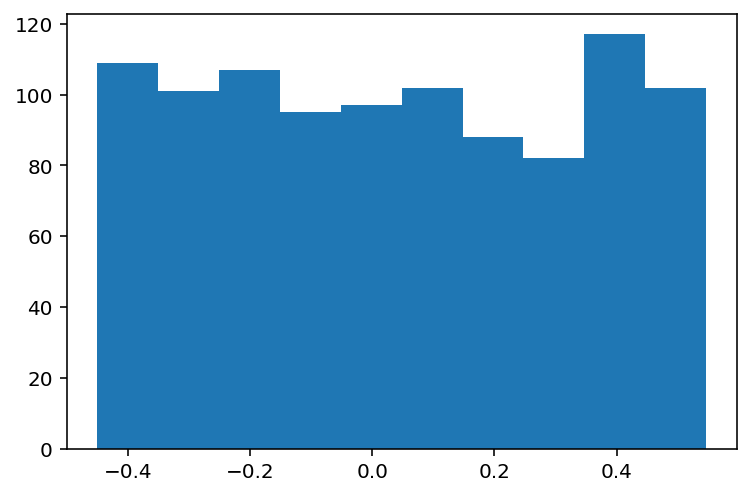

In [96]:
Y = np.random.uniform(size=1000) - 0.45

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y)

In [97]:
# Excerise: Write a loop to generate N_rep sample means from Y. Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means = []
for i in range(N_rep):
    sample_means.append(np.random.choice(Y, size=len(Y), replace=True).mean())

(-0.2, 0.3)

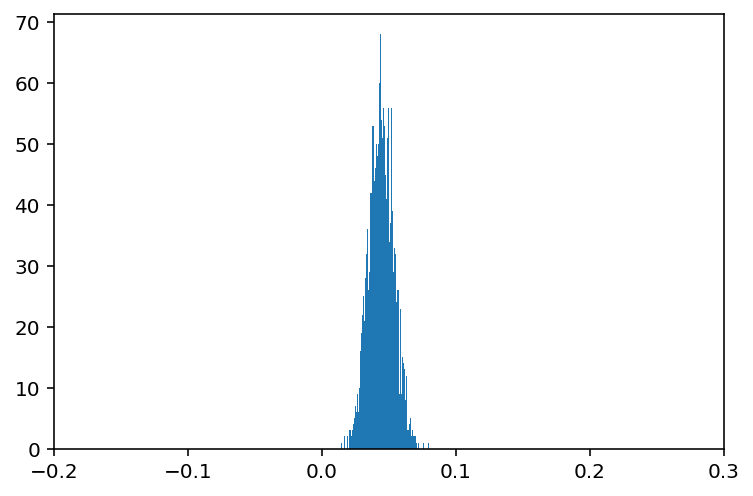

In [98]:
fig, ax = plt.subplots()
b, c, _ = ax.hist(sample_means, bins=100)
ax.set_xlim(-.2, .3)

In [99]:
# one-sided p-value
mu = 0
(np.array(sample_means) < mu).sum() / len(sample_means)

0.0

#### Independant samples

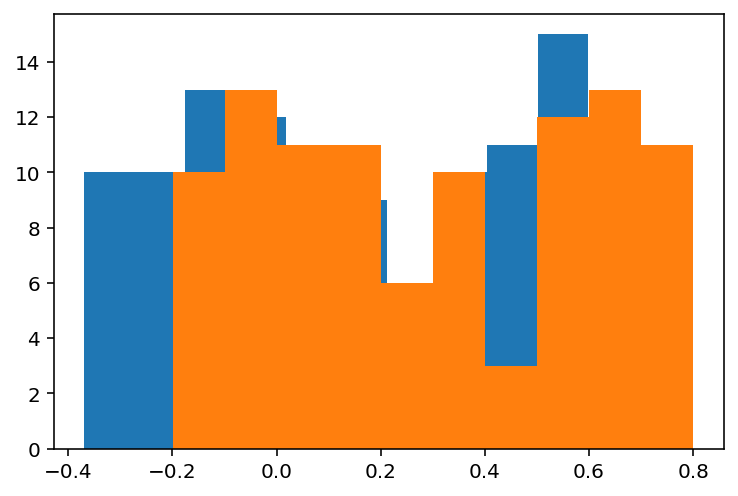

In [100]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y1)
b, c, _ = ax.hist(Y2)

In [103]:
# Excerise: Write a loop to generate N_rep sample means from Y1 and . Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means_1 = []
sample_means_2 = []
for i in range(N_rep):
    sample_means_1.append(np.random.choice(Y1, size=len(Y1), replace=True).mean())
    sample_means_2.append(np.random.choice(Y2, size=len(Y1), replace=True).mean())

how_often_s1_larger = [s1 > s2 for s1 in sample_means_1 for s2 in sample_means_2]
p_value = np.sum(how_often_s1_larger) / len(how_often_s1_larger)

In [104]:
p_value

1.65e-05

### Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

In [107]:
import dabest as db

In [108]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

df = pd.DataFrame({'Control 1': Y1, 'Test 1': Y2})

In [109]:
two_groups_unpaired = db.load(df, idx=("Control 1", "Test 1"), paired=False, id_col="ID")

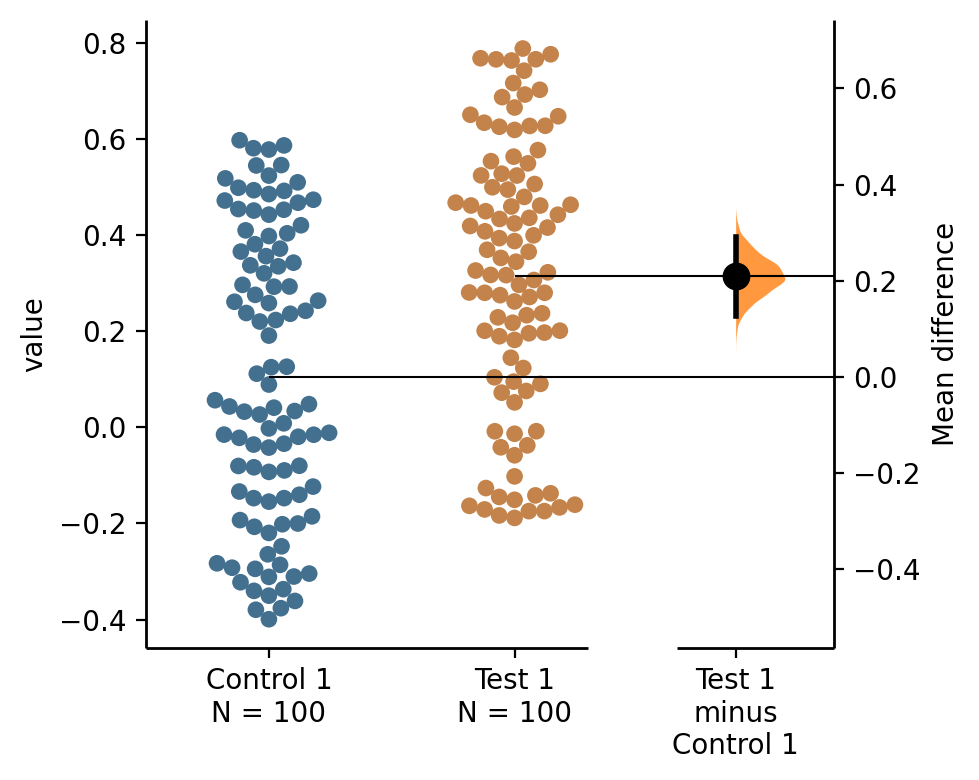

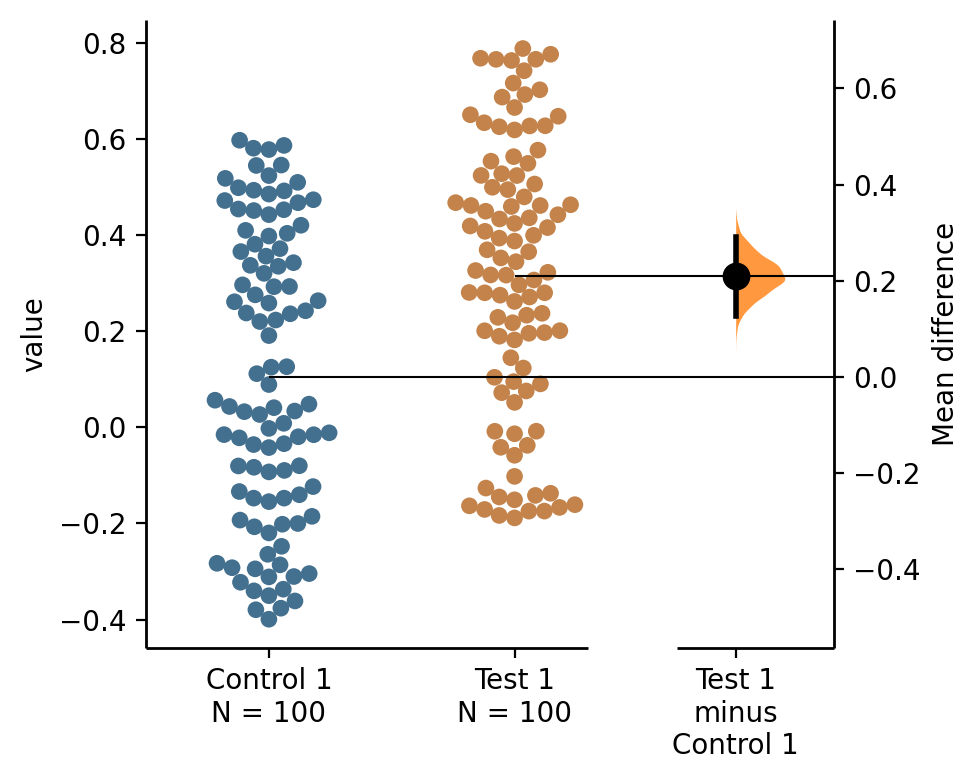

In [110]:
two_groups_unpaired.mean_diff.plot()

UsageError: Line magic function `%` not found.


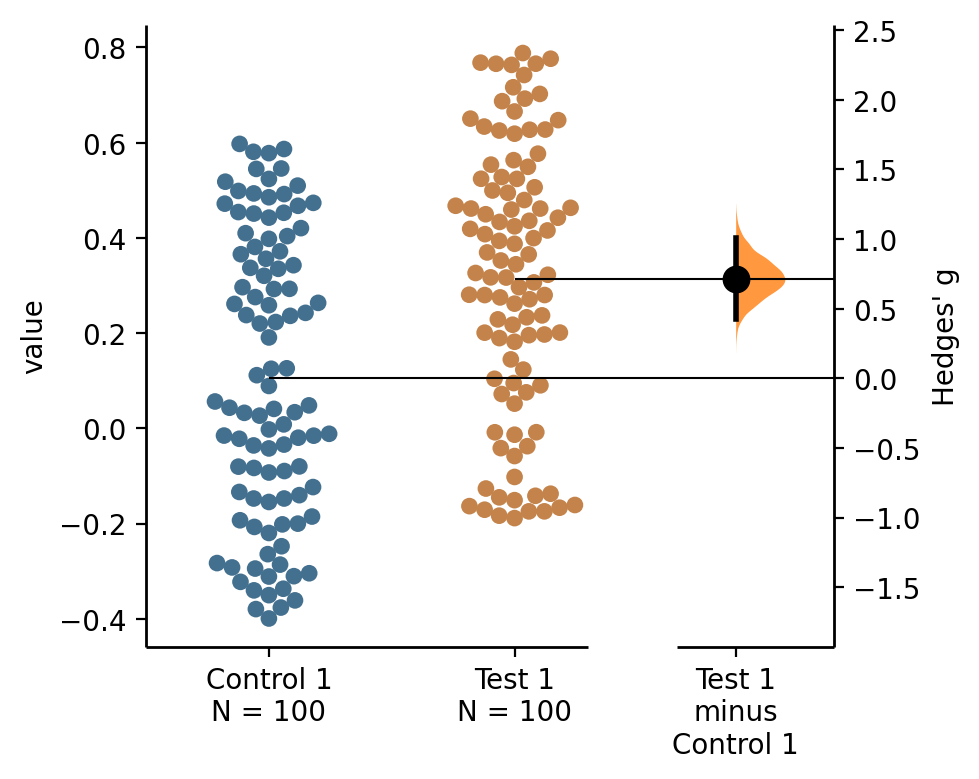

In [112]:
 two_groups_unpaired.hedges_g.plot()
% plt.savefig('/Users/badr/Desktop/dabest.png')

## Non-parametric tests

### Signed-rank tests

#### Wilcoxon sign-test

In [1]:
# Generating non-normal data
Y = np.exp(np.random.randn(100))
Y = Y - Y.mean()

NameError: name 'np' is not defined

In [ ]:
# Plotting data
fig, ax = plt.subplots()
x, c, _ = ax.hist(Y, bins=10)

In [ ]:
# Testing for normality
sps.normaltest(Y)

In [ ]:
# Testing if mean is different from 0 
sps.wilcoxon(Y)

In [ ]:
# Using 
signed_rank_Y = np.sign(Y)*sps.rankdata(Y)
sps.ttest_1samp(signed_rank_Y, popmean=0)

In [ ]:
signed_rank_df = pd.DataFrame({'Y': signed_rank_Y})
smf.ols("Y ~ 1", data=signed_rank_df).fit().pvalues[0]

#### Wilcoxon signed-rank test 

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = X1 + np.random.normal(loc=2, scale=1, size=N)

In [ ]:
sps.wilcoxon(X1, X2)

#### Mann-Whitney U

In [ ]:
# Generating non-normal data
N = 100
X1 = np.exp(np.random.normal(loc=0, scale=2, size=N))
X2 = np.exp(np.random.normal(loc=2, scale=1, size=N))

In [ ]:
sps.mannwhitneyu(X1, X2)

In [ ]:
# Exercise: Compare p values obtained ising a t-test and a rank test for NORMAL data that does 
# satisfy parametric assumptions 








### Bootstrapping and estimation plots

#### One-sample

In [ ]:
Y = np.random.uniform(size=100) - 0.4

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y. Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means = []
for i in range(N_rep):
    ???

#### Independant samples

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

fig, ax = plt.subplots()
b, c, _ = ax.hist(Y1)
b, c, _ = ax.hist(Y2)

In [ ]:
# Excerise: Write a loop to generate N_rep sample means from Y1 and . Uese these to find out a p_value for whether mean differs from 0.

N_rep = 2000 
sample_means_1 = []
sample_means_2 = []
for i in range(N_rep):
    ???

how_often_s1_larger = [s1 > s2 for s1 in sample_means_1 for s2 in sample_means_2]
p_value = np.sum(how_often_s1_larger) / len(how_often_s1_larger)

### Estimation plots using [dabest](https://acclab.github.io/DABEST-python-docs/tutorial.html)

In [ ]:
Y1 = np.random.uniform(size=100) - 0.4
Y2 = np.random.uniform(size=100) - 0.2

df = pd.DataFrame({'Control 1': Y1, 'Test 1': Y2})

In [ ]:
  two_groups_unpaired = db.load(df, idx=("Control 1", "Test 1"), paired=False, id_col="ID")

In [ ]:
two_groups_unpaired.mean_diff.plot()

In [ ]:
 two_groups_unpaired.hedges_g.plot()
 plt.savefig('/Users/badr/Desktop/dabest.png')